In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D



In [61]:
df = pd.read_csv('metrics_calculated.csv')

In [62]:
# Extract the accuracy value from the label column
df['accuracy'] = df['label'].str.extract(r'accuracy-(\d+)', expand=False).fillna(0).astype(int)
df['neighbor'] = df['label'].str.extract(r'N(\d+)', expand=False).fillna(0).astype(int)
df['user_type'] = df['label'].str.split('-').str[-1]
df['user_type'] = df['user_type'].map({'location': 'location', 'id': 'id', 'type': 'type'}).fillna('mix')
df['caching_mode'] = df['label'].str.split('-').str[3]
df['caching_mode'] = df['caching_mode'].map({'standard': 'standard', 'cooperative': 'cooperative'}).fillna('')

df.to_csv('structured_metrics.csv', index=False)


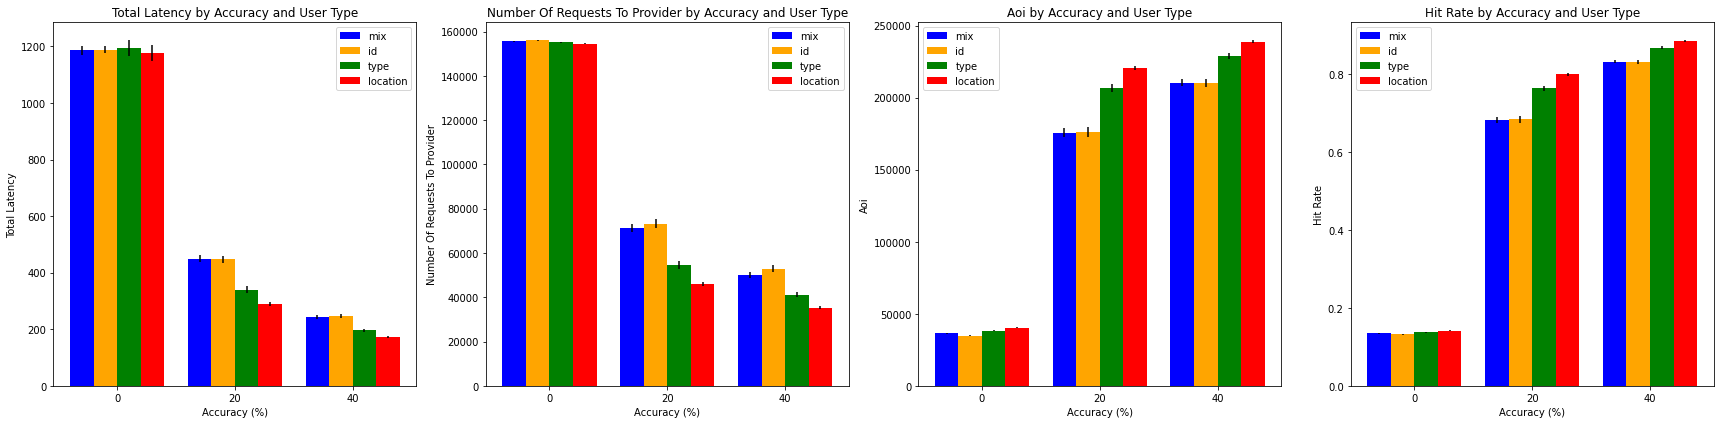

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

graphs = ['total_latency', 'number_of_requests_to_provider', 'aoi', 'hit_rate']

data = pd.read_csv('out.csv')

# Filter N equal to zero and mode not equal to 'cooperative'
filtered_data = data[(data['neighbor'] == 0) & (data['caching_mode'] != 'cooperative')]

# Define the accuracy levels as categorical values
accuracies = [0, 20, 40]

# Define the user types as categorical values
user_types = ['mix', 'id', 'type', 'location']

# Set the figure size
fig, axes = plt.subplots(1, len(graphs), figsize=(6 * len(graphs), 6))

# Iterate over the graphs
for graph_index, graph in enumerate(graphs):
    # Initialize empty lists for storing values and errors for each user type
    values = {user_type: [] for user_type in user_types}
    errors = {user_type: [] for user_type in user_types}

    # Iterate over the accuracy levels and user types
    for accuracy in accuracies:
        for user_type in user_types:
            # Filter data for the current accuracy and user type
            acc_user_data = filtered_data[
                (filtered_data['accuracy'] == accuracy) & (filtered_data['user_type'] == user_type)
            ]
            # Get the mean and error for the current graph
            mean = acc_user_data[f'{graph}_mean'].values[0]
            error = acc_user_data[f'{graph}_calculate_margin_error'].values[0]
            # Append values and errors to the respective lists for the user type
            values[user_type].append(mean)
            errors[user_type].append(error)

    # Set the x-axis positions
    x_positions = np.arange(len(accuracies))
    # Set the width of each bar
    bar_width = 0.2
    # Set the colors for each user type
    colors = ['blue', 'orange', 'green', 'red']

    # Create a subplot for the current graph
    ax = axes[graph_index]

    # Plot the bar chart for each user type
    for i, user_type in enumerate(values.keys()):
        x_positions_shifted = x_positions + (i - (len(user_types) - 1) / 2) * bar_width
        values_ = values[user_type]
        y_err = errors[user_type]
        ax.bar(x_positions_shifted, values_, width=bar_width, yerr=y_err, label=user_type, color=colors[i])

    # Set the x-axis tick positions and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(accuracies)

    # Set the x-axis and y-axis labels
    ax.set_xlabel('Accuracy (%)')
    ax.set_ylabel(graph.replace('_', ' ').title())

    # Set the title and legend
    ax.set_title(f'{graph.replace("_", " ").title()} by Accuracy and User Type')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_163498/975824497.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(y/1000)}k' for y in ax.get_yticks()])
/tmp/ipykernel_163498/975824497.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(y/1000)}k' for y in ax.get_yticks()])


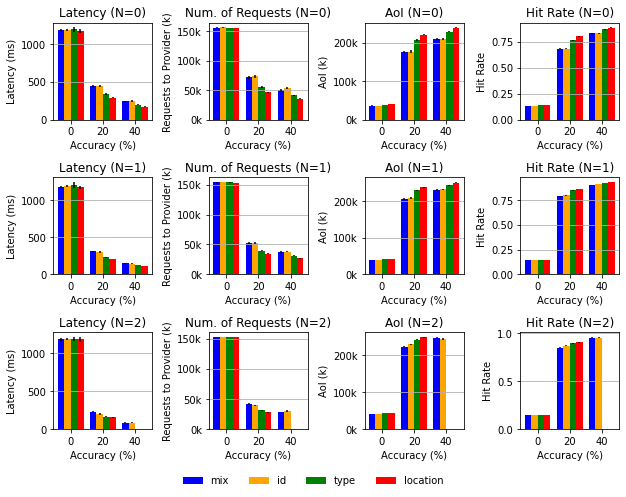

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

graphs = ['total_latency', 'number_of_requests_to_provider', 'aoi', 'hit_rate']
neighbor_values = [0, 1, 2]

data = pd.read_csv('out.csv')

# Define the user types as categorical values
user_types = ['mix', 'id', 'type', 'location']

# Set the figure size
fig, axes = plt.subplots(len(neighbor_values), len(graphs), figsize=(2.2 * len(graphs), 2.2 * len(neighbor_values)))

# Iterate over the neighbor values
for neighbor_index, neighbor in enumerate(neighbor_values):
    # Filter data for the current neighbor value
    filtered_data = data[(data['neighbor'] == neighbor) & (data['caching_mode'] != 'cooperative')]

    # Iterate over the graphs
    for graph_index, graph in enumerate(graphs):
        # Initialize empty lists for storing values and errors for each user type
        values = {user_type: [] for user_type in user_types}
        errors = {user_type: [] for user_type in user_types}

        # Iterate over the accuracy levels and user types
        for accuracy in accuracies:
            for user_type in user_types:
                # Filter data for the current accuracy and user type
                acc_user_data = filtered_data[
                    (filtered_data['accuracy'] == accuracy) & (filtered_data['user_type'] == user_type)
                ]
                # Check if data exists for the current graph and user type
                if len(acc_user_data[f'{graph}_mean']) > 0:
                    # Get the mean and error for the current graph
                    mean = acc_user_data[f'{graph}_mean'].values[0]
                    error = acc_user_data[f'{graph}_calculate_margin_error'].values[0]
                else:
                    # Set mean and error to 0 if no data exists
                    mean = 0
                    error = 0
                # Append values and errors to the respective lists for the user type
                values[user_type].append(mean)
                errors[user_type].append(error)

        # Set the x-axis positions
        x_positions = np.arange(len(accuracies))
        # Set the width of each bar
        bar_width = 0.2
        # Set the colors for each user type
        colors = ['blue', 'orange', 'green', 'red']

        # Create a subplot for the current graph and neighbor value
        ax = axes[neighbor_index, graph_index]

        # Plot the bar chart for each user type
        for i, user_type in enumerate(values.keys()):
            x_positions_shifted = x_positions + (i - (len(user_types) - 1) / 2) * bar_width
            values_ = values[user_type]
            y_err = errors[user_type]
            ax.bar(x_positions_shifted, values_, width=bar_width, yerr=y_err, label=user_type, color=colors[i])

        # Set the x-axis tick positions and labels
        ax.set_xticks(x_positions)
        ax.set_xticklabels(accuracies)

        # Set the x-axis and y-axis labels
        ax.set_xlabel('Accuracy (%)')

        title = ""
        # Set the title and legend
        if graph == 'number_of_requests_to_provider':
            ax.set_ylabel('Requests to Provider (k)')
            ax.set_yticklabels([f'{int(y/1000)}k' for y in ax.get_yticks()])
            title = "Num. of Requests"
        elif graph == 'aoi':
            ax.set_ylabel('AoI (k)')
            ax.set_yticklabels([f'{int(y/1000)}k' for y in ax.get_yticks()])
            title = "AoI"
        elif graph == 'total_latency':
            ax.set_ylabel('Latency (ms)')
            title = "Latency"
        else:
            ax.set_ylabel(graph.replace('_', ' ').title())
            tile = f'{graph.replace("_", " ").title()}'
            title = "Hit Rate"

        ax.set_title(f'{title} (N={neighbor})')
        # ax.legend()
        if (neighbor_index == len(neighbor_values)-1 and graph_index == len(graphs) - 1):
            handles, labels = ax.get_legend_handles_labels()
            fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.05), frameon=False)

        # Add horizontal grid
        ax.yaxis.grid(True)

# Adjust the spacing between subplots
fig.tight_layout(rect=[0, 0, 1, 1])


# Show the plot
plt.savefig('overall.pdf', format='pdf')

plt.show()


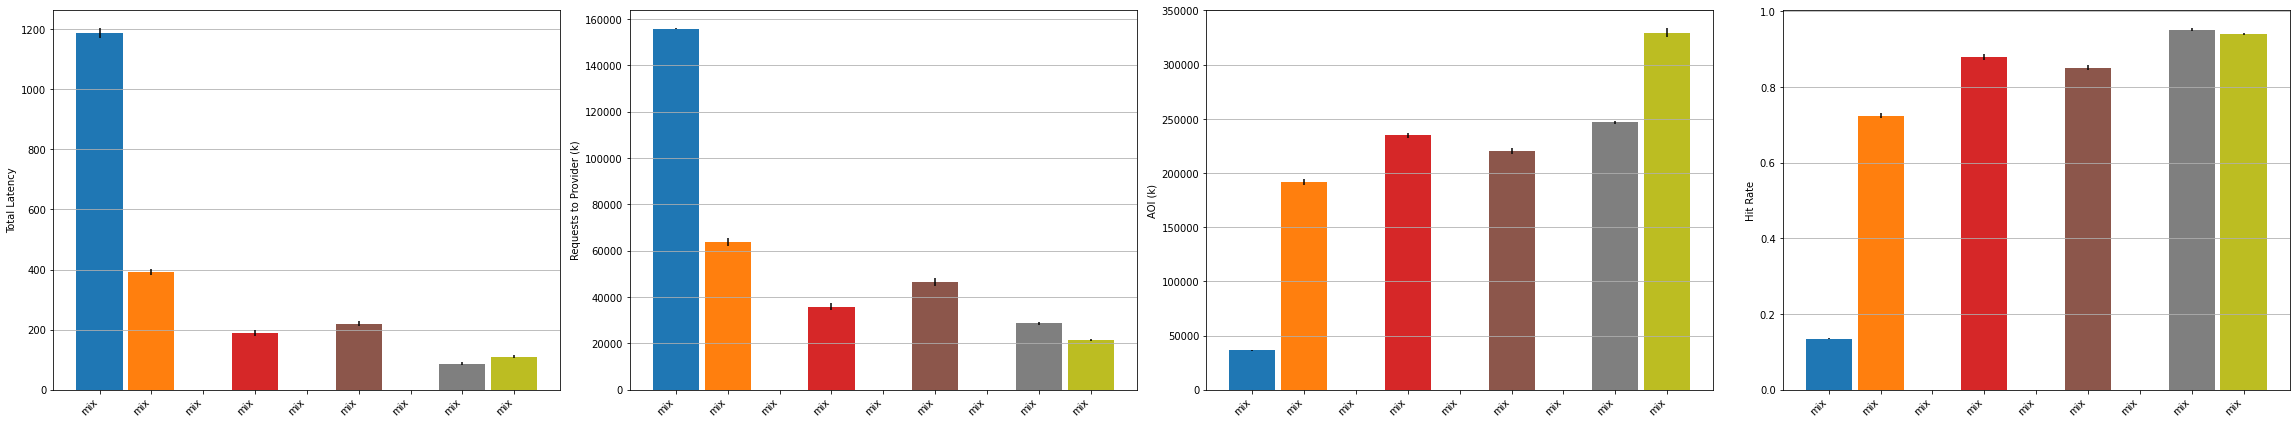

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('out.csv')

# Define the graphs and labels
graphs = ['total_latency', 'number_of_requests_to_provider', 'aoi', 'hit_rate']
labels = ['accuracy-0-N0-standard-cache-mode-mix', 'accuracy-20.0-N0-standard-cache-mode-mix',
          'accuracy-20.0-N0-cooperative-cache-mode-mix', 'accuracy-20.0-N2-standard-cache-mode-mix',
          'accuracy-20.0-N2-cooperative-cache-mode-mix', 'accuracy-40.0-N0-standard-cache-mode-mix',
          'accuracy-40.0-N0-cooperative-cache-mode-mix', 'accuracy-40.0-N2-standard-cache-mode-mix',
          'accuracy-40.0-N2-cooperative-cache-mode-mix']

# Set the figure size
fig, axes = plt.subplots(1, len(graphs), figsize=(8 * len(graphs), 6))

# Define the colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# Iterate over the graphs
for graph_index, graph in enumerate(graphs):
    # Initialize empty lists for storing values and errors for each label
    values = []
    errors = []

    # Iterate over the labels
    for label in labels:
        # Filter data for the current label
        label_data = data[data['label'].str.contains(label)]
        # Check if data is available for the label
        if len(label_data) > 0:
            # Get the mean and error for the current graph and label
            mean = label_data[f'{graph}_mean'].values[0]
            error = label_data[f'{graph}_calculate_margin_error'].values[0]
        else:
            # If data is not available, assign 0 for mean and error
            mean = 0
            error = 0
        # Append values and errors to the respective lists
        values.append(mean)
        errors.append(error)

    # Set the x-axis positions
    x_positions = np.arange(len(labels))
    # Set the width of each bar
    bar_width = 8 / len(labels)

    # Create a subplot for the current graph
    ax = axes[graph_index]

    # Sort the labels based on the accuracy level
    sorted_values = [values[i] for i in np.argsort([label.split('-')[1] for label in labels])]
    sorted_errors = [errors[i] for i in np.argsort([label.split('-')[1] for label in labels])]
    sorted_labels = [labels[i].split('-')[-1] for i in np.argsort([label.split('-')[1] for label in labels])]

    # Plot the bar chart
    ax.bar(x_positions, sorted_values, width=bar_width, yerr=sorted_errors, align='center', color=colors)

    # Set the x-axis tick positions and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(sorted_labels, rotation=45, ha='right')

    # Set the y-axis label
    if graph == 'number_of_requests_to_provider':
        ax.set_ylabel('Requests to Provider (k)')
    elif graph == 'aoi':
        ax.set_ylabel('AOI (k)')
    else:
        ax.set_ylabel(graph.replace('_', ' ').title())

    # Add a horizontal grid
    ax.yaxis.grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Save the plot as PDF
plt.savefig('graphs.pdf', format='pdf')

# Show the plot
plt.show()
